<a href="https://colab.research.google.com/github/kohi2112002/BirminghamCarpark/blob/main/Birmingham_Carpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preparation for Python**

In [332]:
# activate R magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [333]:
# Library from python
import pandas as pd
import numpy as np

In [334]:
# Clone data - Python
!git clone https://github.com/kohi2112002/BirminghamCarpark.git

df = pd.read_csv("/content/BirminghamCarpark/Bir carpark.csv")
df.head()

fatal: destination path 'BirminghamCarpark' already exists and is not an empty directory.


,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


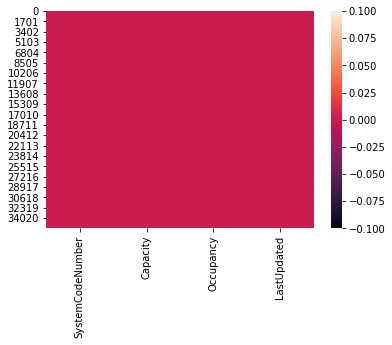

In [335]:
import seaborn as sns
import matplotlib.pyplot as plt
#Checking null data
sns.heatmap(df.isnull())

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SystemCodeNumber  35717 non-null  object
 1   Capacity          35717 non-null  int64 
 2   Occupancy         35717 non-null  int64 
 3   LastUpdated       35717 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


# **Data Preprocessing**

In [337]:
#Deal with date and time
df_date_time = pd.DataFrame(df.LastUpdated.str.split(' ',1).tolist(), columns = ['Date','Time'])
df_Datesplit = pd.DataFrame(df_date_time.Date.str.split('-').tolist(), columns = ['Year','Month','Day'])
df_Timesplit = pd.DataFrame(df_date_time.Time.str.split(':').tolist(), columns = ['Hour','Minute','Second'])

df['Year'],df['Month'],df['Day'] = df_Datesplit['Year'], df_Datesplit['Month'], df_Datesplit['Day'] 
df['Hour'],df['Minute'],df['Second'] = df_Timesplit['Hour'], df_Timesplit['Minute'], df_Timesplit['Second'] 

#Delete all record that the occupancy is more than the capacity
df = df.loc[df['Capacity'] > df['Occupancy']]
df = df.loc[(df['Capacity'] > 0) & (df['Occupancy'] >0)]

In [338]:
#Get data filter
AllCarpark = df.SystemCodeNumber.value_counts() #Get all carpark
AllMonth = df['Month'].value_counts() #Get all month

print(AllCarpark.values)
print(AllCarpark.index)

df = df.loc[(df.SystemCodeNumber != 'NIA North') & (df.SystemCodeNumber != 'BHMBRTARC01')]

#Update CarPark list
AllCarpark = df.SystemCodeNumber.value_counts()
print(AllCarpark.index)

[1312 1312 1312 1312 1312 1312 1312 1312 1312 1312 1310 1308 1308 1294
 1291 1289 1280 1269 1260 1204 1204 1186 1186 1186 1139 1067 1029 1020
  140   88]
Index(['Others-CCCPS98', 'Others-CCCPS105a', 'BHMNCPNST01', 'Shopping',
       'BHMBCCMKT01', 'Others-CCCPS119a', 'Others-CCCPS135a', 'BHMNCPHST01',
       'Others-CCCPS8', 'Others-CCCPS202', 'Broad Street', 'BHMMBMMBX01',
       'BHMEURBRD01', 'Others-CCCPS133', 'BHMNCPPLS01', 'BHMNCPLDH01',
       'BHMBCCSNH01', 'BHMBCCPST01', 'BHMEURBRD02', 'NIA South',
       'NIA Car Parks', 'Bull Ring', 'BHMNCPRAN01', 'BHMBRCBRG03',
       'BHMBRCBRG02', 'BHMBCCTHL01', 'BHMBRCBRG01', 'BHMNCPNHS01', 'NIA North',
       'BHMBRTARC01'],
      dtype='object')
Index(['BHMNCPHST01', 'Others-CCCPS98', 'Others-CCCPS8', 'Others-CCCPS202',
       'BHMNCPNST01', 'Shopping', 'BHMBCCMKT01', 'Others-CCCPS105a',
       'Others-CCCPS119a', 'Others-CCCPS135a', 'Broad Street', 'BHMEURBRD01',
       'BHMMBMMBX01', 'Others-CCCPS133', 'BHMNCPPLS01', 'BHMNCPLDH01',
 

In [339]:
#Instantiate dataframe for checking correlation
pre_corr_df = df.drop(['Year','Month','Day','Hour','Minute','Second'], axis=1)

#Convert to Date and Time
pre_corr_df['LastUpdated'] = pd.to_datetime(pre_corr_df['LastUpdated'])

# **Visualization with Python**

## **Checking Occupancy Correlation**

In [340]:
#Get needed data
check_corr_df = pre_corr_df.drop(['Capacity', 'LastUpdated'], axis = 1)
occu_lst = []
for i in range(len(AllCarpark)):
  transfer = check_corr_df.loc[check_corr_df.SystemCodeNumber == AllCarpark.index[i]].Occupancy
  occu_lst.append(transfer.values) #Store all 

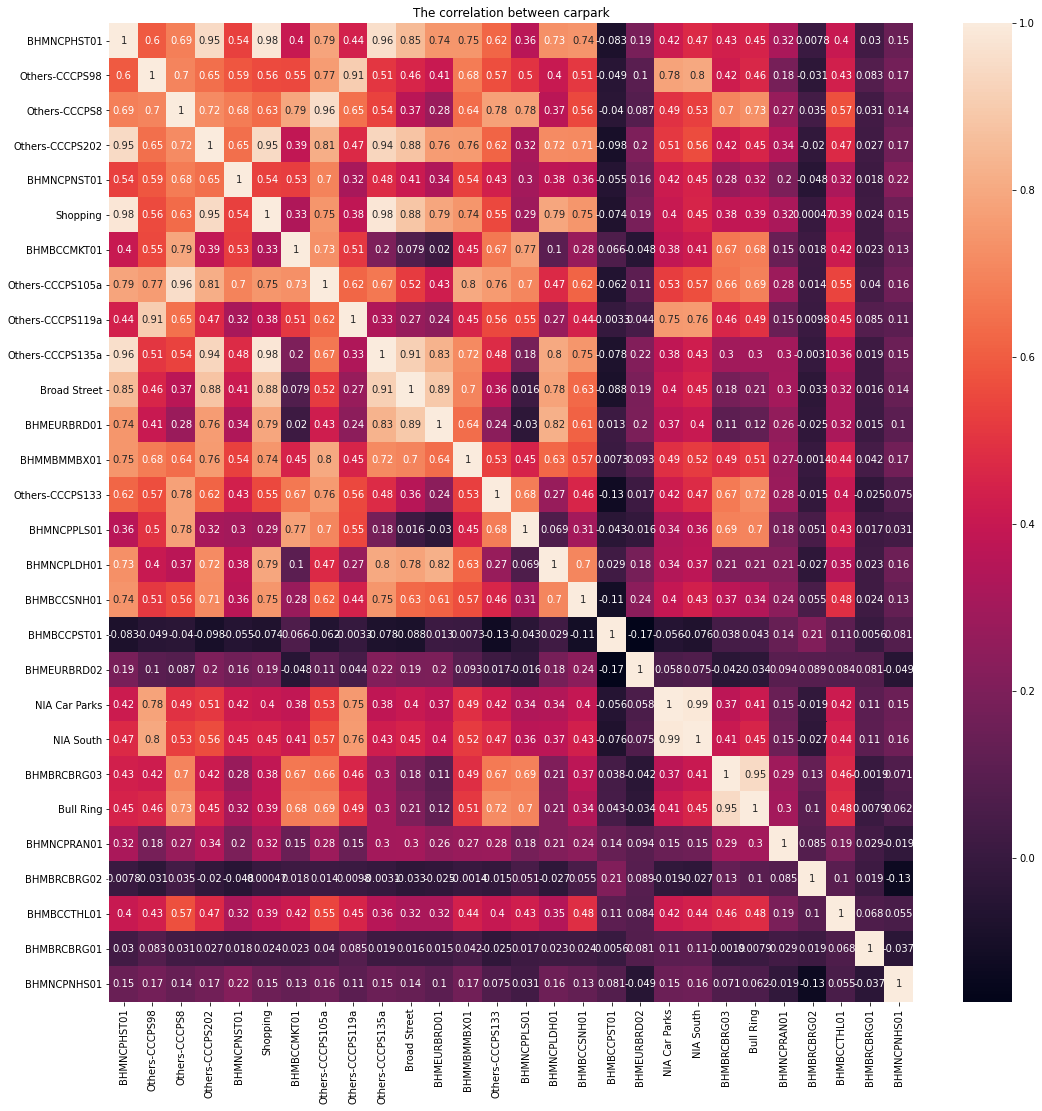

In [341]:
#Dealing with missing data
for i in range(len(occu_lst)):
  if(len(occu_lst[i]) < 1312):
    LEN = len(occu_lst[i])
    MEAN = int(occu_lst[i].mean())
    occu_lst[i] = occu_lst[i].tolist()
    for x in range(LEN, 1312):
      occu_lst[i].append(MEAN)

carpark_lst = []
for i in range(len(AllCarpark)):
  carpark_lst.append(AllCarpark.index[i]) #Convert from a Series index to list

#Instantiate a dataframe of carpark and occupancy
np_occu_lst = np.array(occu_lst)
opt_data = pd.DataFrame(np_occu_lst.T, columns= carpark_lst)

opt_data.to_csv('/content/sample_data/uncorred.csv')
#Get correaltion matrix
corr_data = opt_data.corr()
corr_data.to_csv('/content/sample_data/corred.csv')

#Plot correlation score
plt.figure(figsize=(18,18))
plt.title("The correlation between carpark")
sns.heatmap(corr_data, annot = True)

## **Carpark Occupancy on October, November, December from 7 am to 4 pm**

In [342]:
#The below function is used to plot 
def Kplot(t):
  plt.figure(figsize=(25,3))
  for i in range(3):
    plt.subplot(1,3,i+1)
    plt.title("Carpark {0} on {1}".format(AllCarpark.index[t], AllMonth.index[i]))
    sns.lineplot(x= 'Hour', y= 'Occupancy', data= df.loc[(df.SystemCodeNumber == AllCarpark.index[t]) & (df.Month == AllMonth.index[i])]) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

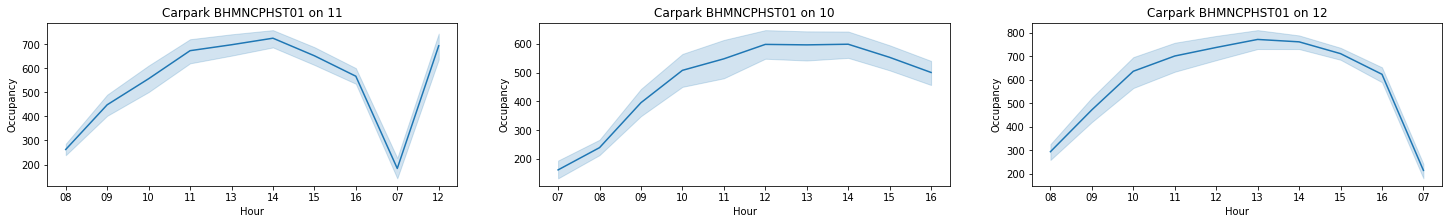

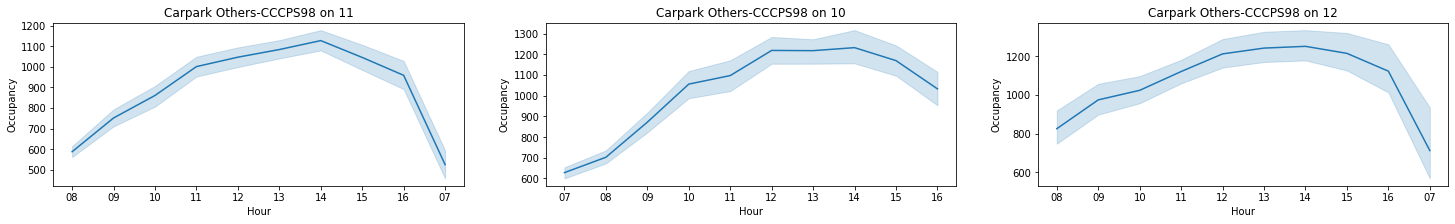

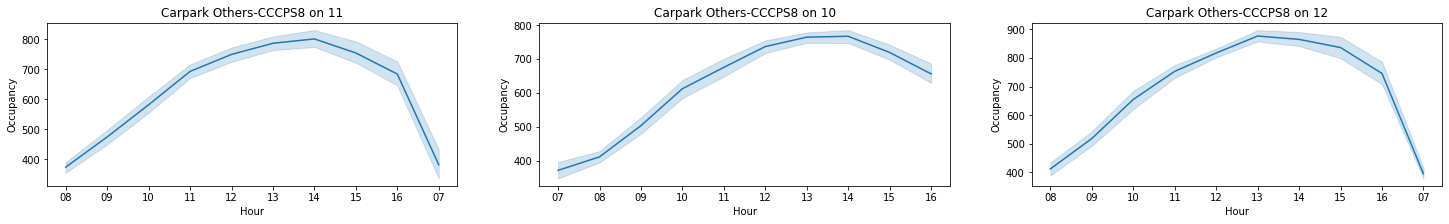

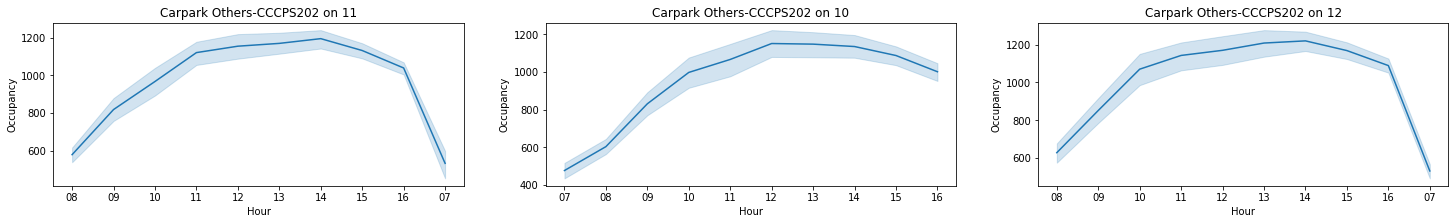

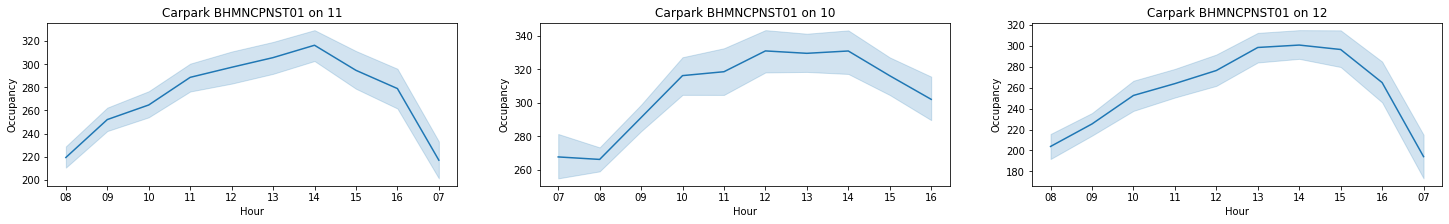

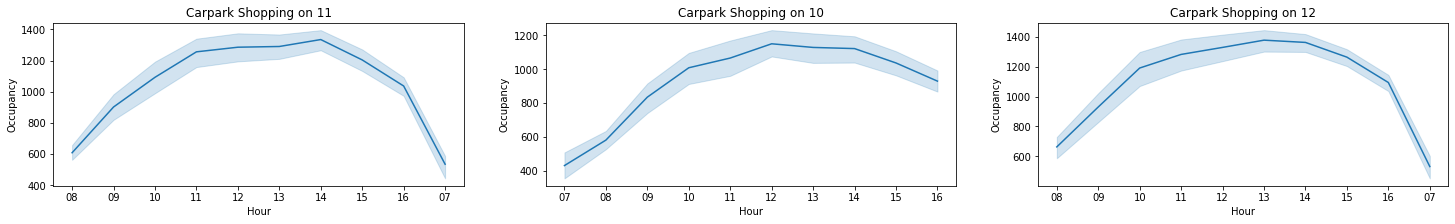

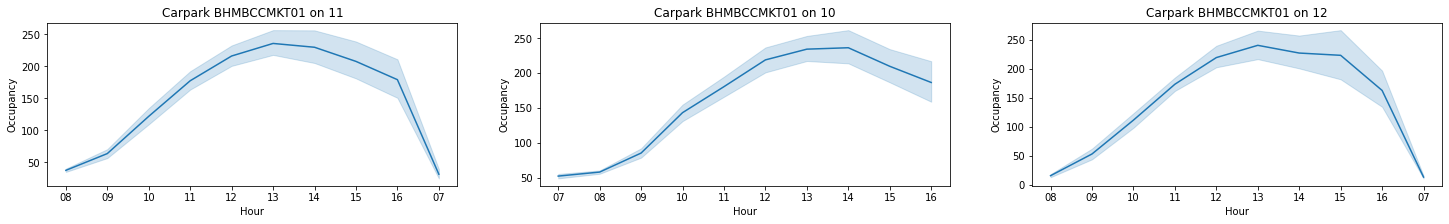

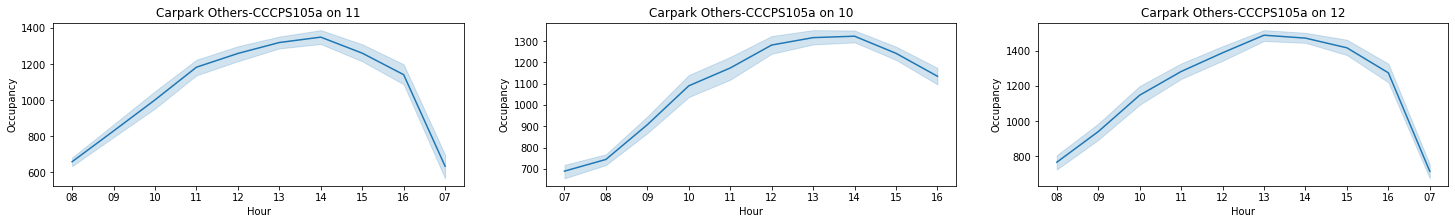

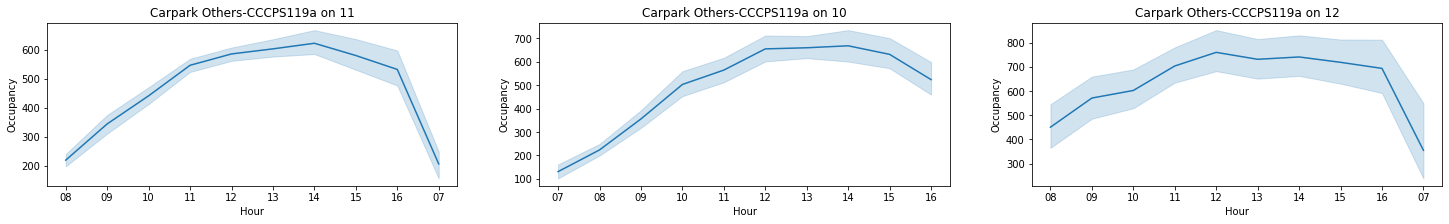

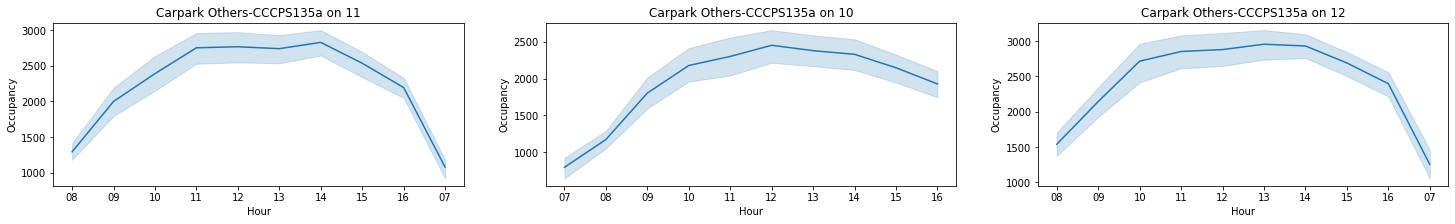

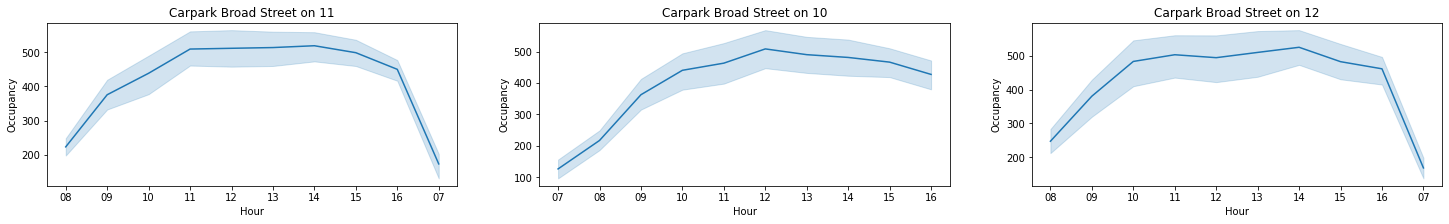

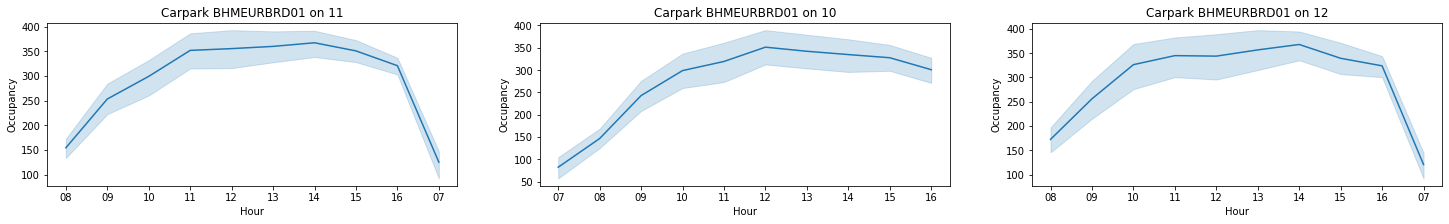

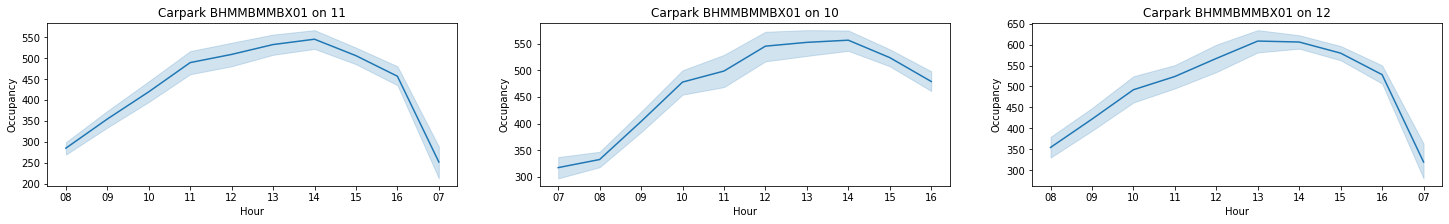

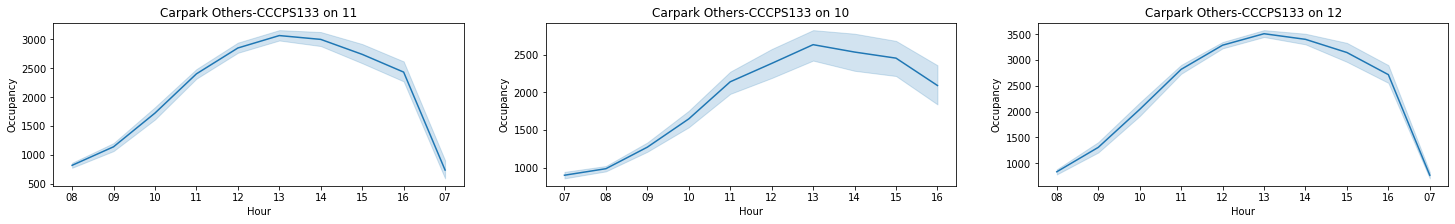

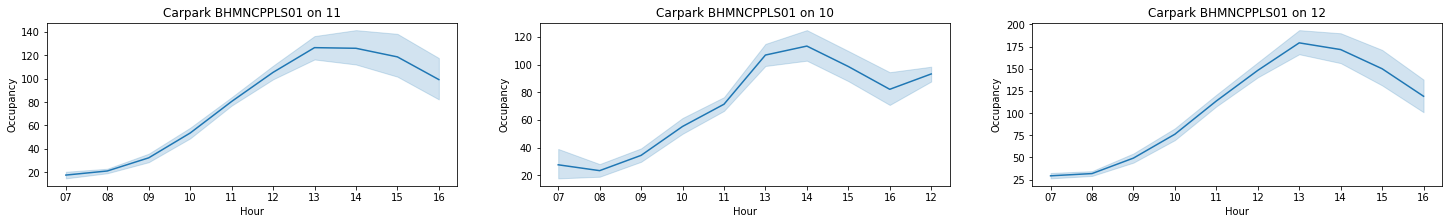

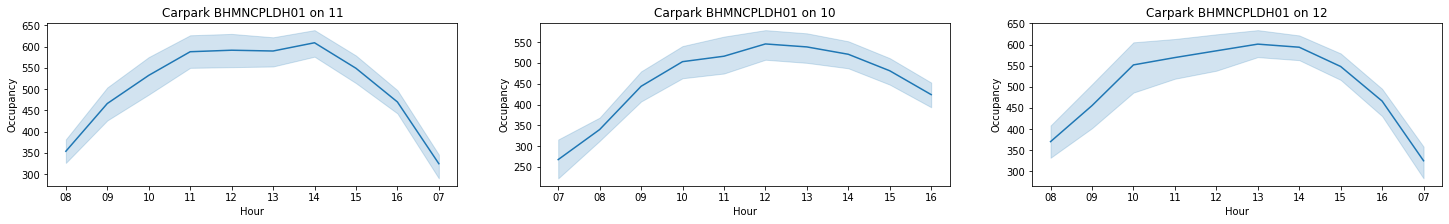

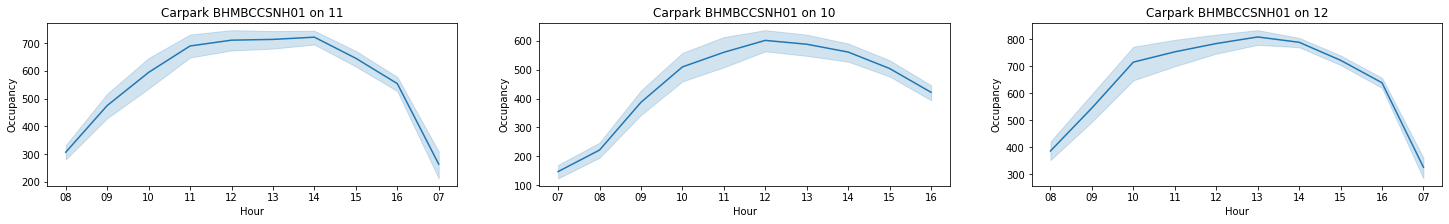

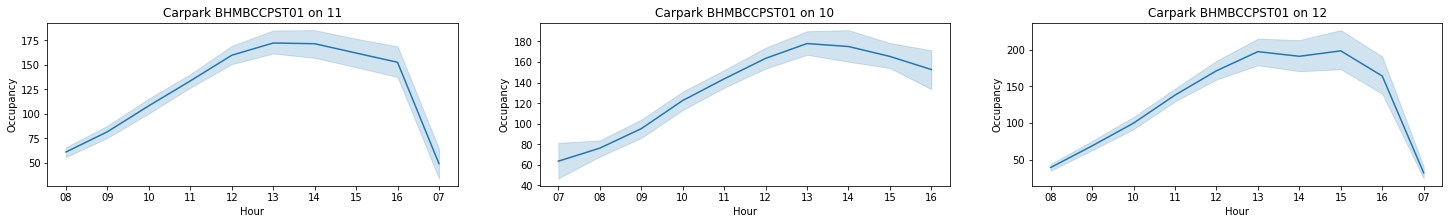

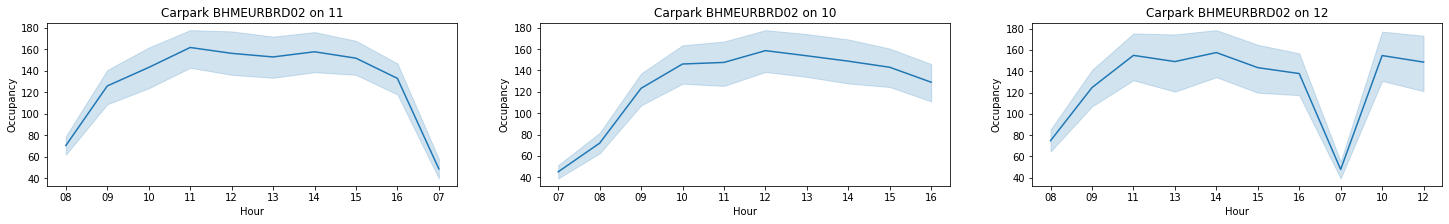

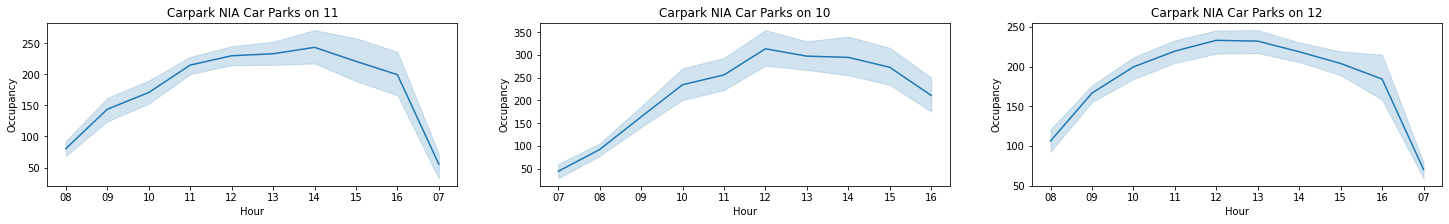

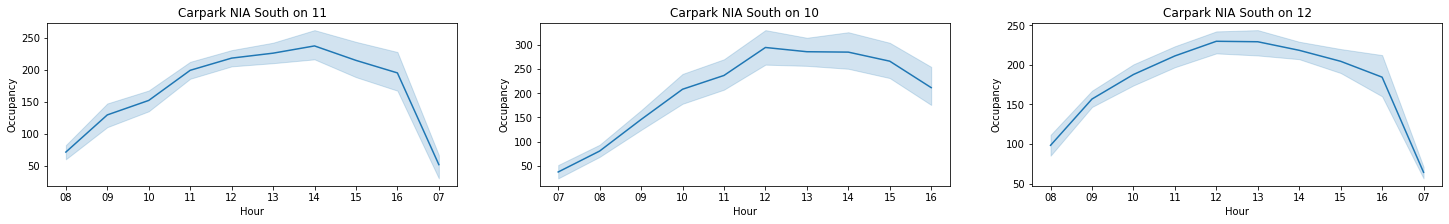

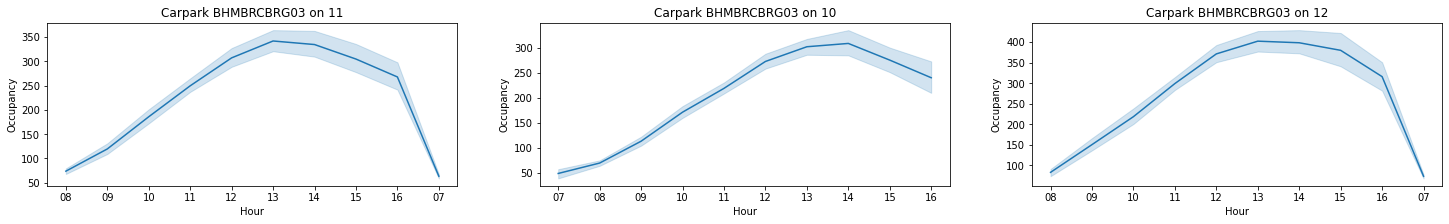

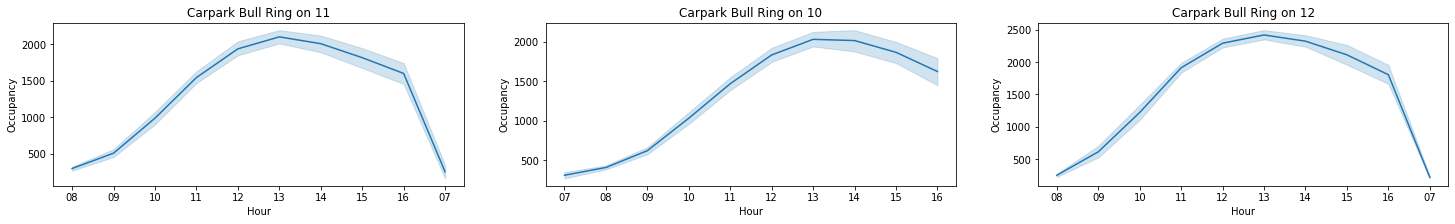

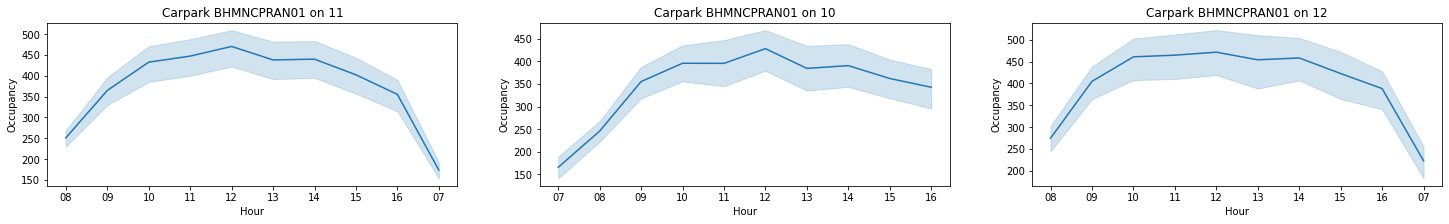

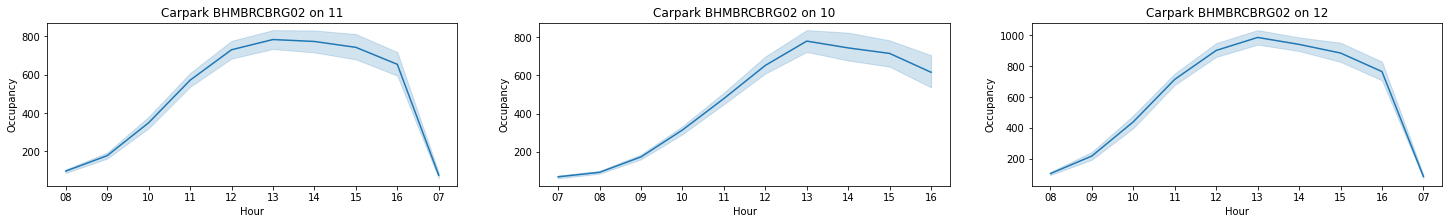

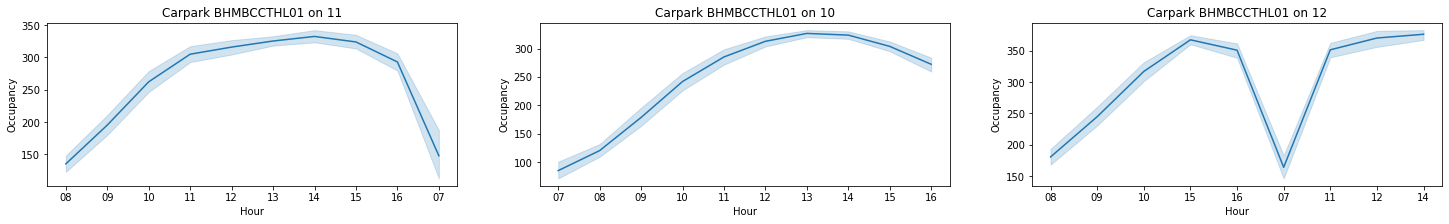

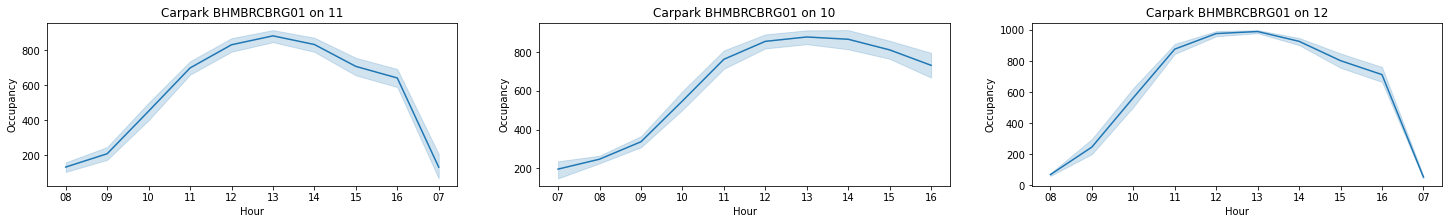

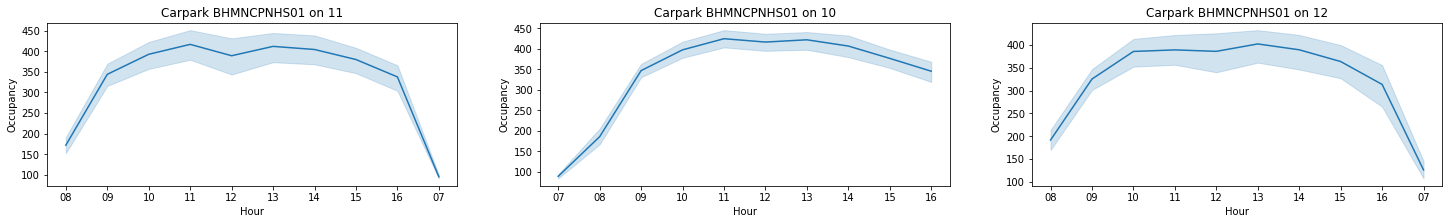

In [343]:
for j in range(len(AllCarpark)):
  Kplot(j)

## **Get A carpark whose occupancy nearly reach capacity**

In [344]:
#Get the highest reaching capacity group of carpark
Ca_Oc_df = df.drop(['LastUpdated', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'], axis = 1)

Ca_Oc_df['diffrate'] = Ca_Oc_df['Occupancy']/Ca_Oc_df['Capacity']

check_rate_df = Ca_Oc_df.groupby(['SystemCodeNumber']).mean()
check_maxrate_df = check_rate_df.sort_values(by=['diffrate'], ascending=False)
check_maxrate_df.head()

,Capacity,Occupancy,diffrate
SystemCodeNumber,,,
BHMNCPNHS01,500.0,352.933333,0.705867
BHMNCPLDH01,720.0,504.694337,0.700964
BHMMBMMBX01,687.0,476.659786,0.693828
BHMBCCTHL01,387.0,263.343018,0.680473
BHMBCCSNH01,863.0,568.914844,0.659229


# **Build Linear Regression Model With SkLearn**

In [345]:
#Get needed library
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [346]:
#Define some function for particular task

#This function is used to calculate the Standard Deviation authored by Khoi
def KHOI_standard_deviation(y_true, y_pred):
  if(len(y_true) != len(y_pred)):
    print("Error")
  N = len(y_true)
  mean_y_true = np.mean(y_true, dtype=np.float64)
  mean_array = np.array([mean_y_true for i in range(N)])
  distance = (y_pred - mean_array)
  sum_dis = distance @ distance.T
  mean_sum_dis = sum_dis/N
  return math.sqrt(mean_sum_dis)

#This function is used to calculate the accuracy rate
def KHOI_Accuracy(y_true, y_pred):
		m = np.size(y_true)
		error = y_pred - y_true 
		return (1/(2*m)) * (np.transpose(error)@error)

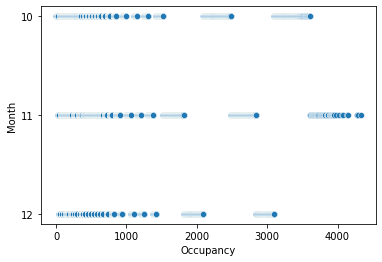

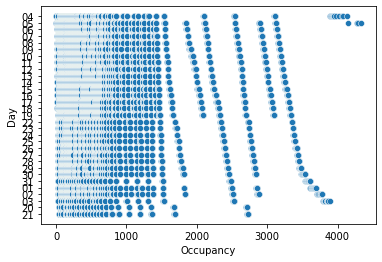

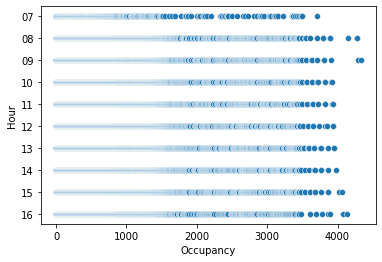

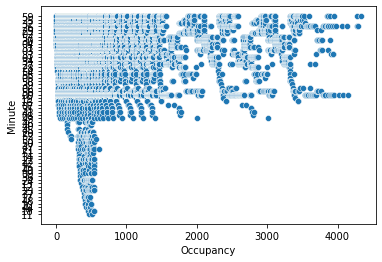

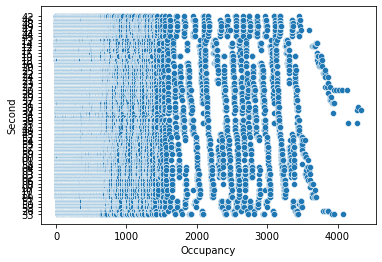

In [347]:
#Get needed data for shopping
need_df = df.drop(['LastUpdated', 'Year', 'Capacity'], axis = 1)

lst = ['Month', 'Day', 'Hour', 'Minute', 'Second']
need_df = need_df.sort_values(by=['Occupancy'])
check_shop_corr = need_df.loc[need_df['SystemCodeNumber'] == 'Shopping']
check_shop_corr = need_df.iloc[:,1:]
check_shop_corr = check_shop_corr.reset_index().drop(['index'], axis = 1)

for i in range(5):
  plt.figure(i)
  sns.scatterplot(x = check_shop_corr.Occupancy, y = df[lst[i]])

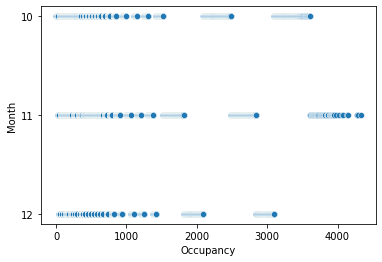

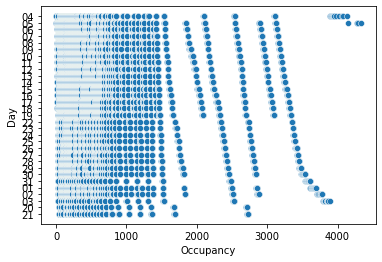

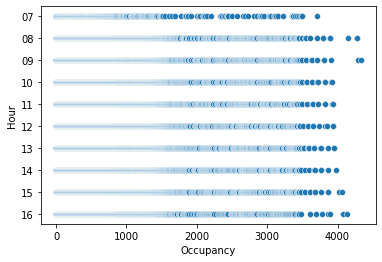

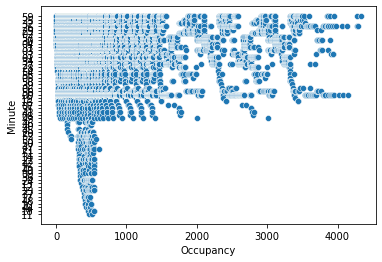

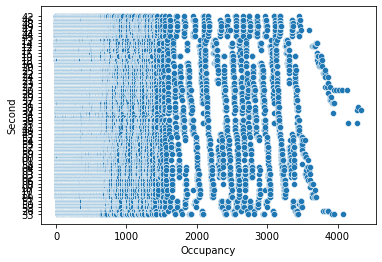

In [348]:
#Get needed data for BHMN
need_df = df.drop(['LastUpdated', 'Year', 'Capacity'], axis = 1)

lst = ['Month', 'Day', 'Hour', 'Minute', 'Second']
need_df = need_df.sort_values(by=['Occupancy'])
check_BHMN_corr = need_df.loc[need_df['SystemCodeNumber'] == 'BHMNCPHST01']
check_BHMN_corr = need_df.iloc[:,1:]
check_BHMN_corr = check_BHMN_corr.reset_index().drop(['index'], axis = 1)

for i in range(5):
  plt.figure(i)
  sns.scatterplot(x = check_BHMN_corr.Occupancy, y = df[lst[i]])

In [349]:
#Drop not needed info
need_df = need_df.drop(['Month', 'Day', 'Second'], axis = 1)

#Convert string to number
need_df['Occupancy'] = pd.to_numeric(need_df['Occupancy'])
need_df['Hour'] = pd.to_numeric(need_df['Hour'])
need_df['Minute'] = pd.to_numeric(need_df['Minute'])

#Change the order of df
need_df['Occupancy_Target'] = need_df['Occupancy']
need_df = need_df.drop(['Occupancy'], axis = 1)

#Partitioning data
Shopping_df = need_df.loc[need_df['SystemCodeNumber'] == 'Shopping']
opt_shop_df = Shopping_df.drop(['SystemCodeNumber'], axis = 1)
BHMNCPHST01_df = need_df.loc[need_df['SystemCodeNumber'] == 'BHMNCPHST01']
opt_BHMN_df = BHMNCPHST01_df.drop(['SystemCodeNumber'], axis = 1)

#Scaled data by MinMaxScaler
scaler = MinMaxScaler()
scaled_shop_df = scaler.fit_transform(opt_shop_df)
scaled_BHMN_df = scaler.fit_transform(opt_BHMN_df)

#Dividing data into feature and target
X_shop = scaled_shop_df[:,:2]
X_BHMN = scaled_BHMN_df[:,:2]
Y_shop = scaled_shop_df[:, -1]
Y_BHMN = scaled_BHMN_df[:, -1]

#Get lenght 
X_shop_row = np.size(X_shop[:,0])
X_BHMN_row = np.size(X_BHMN[:,0])
Y_shop_row = np.size(Y_shop)
Y_BHMN_row = np.size(Y_BHMN)

#Get final length
hX1,hY1 = int(int(X_shop_row)/2), int(int(Y_shop_row)/2)
hX2,hY2 = int(int(X_shop_row)/3), int(int(Y_shop_row)/3)
hX3,hY3 = int(int(X_shop_row)/9), int(int(Y_shop_row)/9)

bX1,bY1 = int(int(X_BHMN_row)/2), int(int(Y_BHMN_row)/2)
bX2,bY2 = int(int(X_BHMN_row)/3), int(int(Y_BHMN_row)/3)
bX3,bY3 = int(int(X_BHMN_row)/9), int(int(Y_BHMN_row)/9)


#Spliting data into train and test set
X_shop_train1, X_shop_test1,Y_shop_train1,Y_shop_test1 = train_test_split(X_shop, Y_shop, test_size = 0.1, random_state=100)
X_shop_train2, X_shop_test2,Y_shop_train2,Y_shop_test2 = train_test_split(X_shop, Y_shop, test_size = 0.1, random_state=200)
X_shop_train3, X_shop_test3,Y_shop_train3,Y_shop_test3 = train_test_split(X_shop, Y_shop, test_size = 0.1, random_state=300)

X_BHMN_train1, X_BHMN_test1,Y_BHMN_train1,Y_BHMN_test1 = train_test_split(X_BHMN, Y_BHMN, test_size = 0.1, random_state=100)
X_BHMN_train2, X_BHMN_test2,Y_BHMN_train2,Y_BHMN_test2 = train_test_split(X_BHMN, Y_BHMN, test_size = 0.1, random_state=200)
X_BHMN_train3, X_BHMN_test3,Y_BHMN_train3,Y_BHMN_test3 = train_test_split(X_BHMN, Y_BHMN, test_size = 0.1, random_state=300)

#Store data
X_Shop_train_lst = [X_shop_train1, X_shop_train2, X_shop_train3]
X_Shop_test_lst = [X_shop_test1, X_shop_test2, X_shop_test3]
Y_Shop_act_lst = [Y_shop_test1, Y_shop_test2, Y_shop_test3]
Y_Shop_train_lst = [Y_shop_train1, Y_shop_train2, Y_shop_train3]

X_BHMN_train_lst = [X_BHMN_train1, X_BHMN_train2, X_BHMN_train3]
X_BHMN_test_lst = [X_BHMN_test1, X_BHMN_test2, X_BHMN_test3]
Y_BHMN_act_lst = [Y_BHMN_test1, Y_BHMN_test2, Y_BHMN_test3]
Y_BHMN_train_lst = [Y_BHMN_train1, Y_BHMN_train2, Y_BHMN_train3]

need_df.head()

,SystemCodeNumber,Hour,Minute,Occupancy_Target
24828,NIA South,8,31,1
24827,NIA South,7,57,1
23462,NIA Car Parks,8,31,1
23461,NIA Car Parks,7,57,1
1618,BHMBCCPST01,7,59,2


In [350]:
#Create linear regression object
regr = linear_model.LinearRegression()

#Linear Regression Model for Shopping carpark

for i in range(3):
  #Deploy model
  regr.fit(X_Shop_train_lst[i], Y_Shop_train_lst[i])
  Y_Shop_pred = regr.predict(X_Shop_test_lst[i])
  #Print preditct output
  # print("The predict labels {0}th: {1}".format(i, Y_Shop_pred))
  #Print RMSE
  rmse = math.sqrt(mean_squared_error(Y_Shop_act_lst[i], Y_Shop_pred))
  print("Root Mean Square Error for Shopping Carpark {0}th test: {1}\n".format(i, rmse))
  #Print Standard Deviation
  SD = KHOI_standard_deviation(Y_Shop_act_lst[i], Y_Shop_pred)
  print('The Standard Deviation for Shopping Carpark {0}th test: {1}\n'.format(i, SD))
  #Print Accuracy Rate
  acc = (r2_score(Y_Shop_act_lst[i], Y_Shop_pred) * 100)
  print("The Accuracy Rate for Shopping Carpark {0}th test: {1}%\n".format(i, acc))

print("\n\n\n")

for i in range(3):
  #Deploy model
  regr.fit(X_BHMN_train_lst[i], Y_BHMN_train_lst[i])
  Y_BHMN_pred = regr.predict(X_BHMN_test_lst[i])
  #Print preditct output
  # print("The predict labels {0}th: {1}".format(i, Y_Shop_pred))
  #Print RMSE
  rmse = math.sqrt(mean_squared_error(Y_BHMN_act_lst[i], Y_BHMN_pred))
  print("Root Mean Square Error for Shopping Carpark {0}th test: {1}\n".format(i, rmse))
  #Print Standard Deviation
  SD = KHOI_standard_deviation(Y_BHMN_act_lst[i], Y_BHMN_pred)
  print('The Standard Deviation for Shopping Carpark {0}th test: {1}\n'.format(i, SD))
  #Print Accuracy Rate
  acc = (r2_score(Y_BHMN_act_lst[i], Y_BHMN_pred) * 100)
  print("The Accuracy Rate for Shopping Carpark {0}th test: {1}%\n".format(i, acc))

Root Mean Square Error for Shopping Carpark 0th test: 0.24154092230453084

The Standard Deviation for Shopping Carpark 0th test: 0.10323174540701911

The Accuracy Rate for Shopping Carpark 0th test: 18.26348095054009%

Root Mean Square Error for Shopping Carpark 1th test: 0.2395563480640725

The Standard Deviation for Shopping Carpark 1th test: 0.1112216745678472

The Accuracy Rate for Shopping Carpark 1th test: 13.098146057906524%

Root Mean Square Error for Shopping Carpark 2th test: 0.25137688332028196

The Standard Deviation for Shopping Carpark 2th test: 0.09708201541308331

The Accuracy Rate for Shopping Carpark 2th test: 17.44106224456823%





Root Mean Square Error for Shopping Carpark 0th test: 0.21322015818091486

The Standard Deviation for Shopping Carpark 0th test: 0.11571256915058899

The Accuracy Rate for Shopping Carpark 0th test: 0.2874002399018287%

Root Mean Square Error for Shopping Carpark 1th test: 0.22102439169941596

The Standard Deviation for Shopping Carpark 1